
# **Linear Regression**


Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. In this project, we are going to design a controller to manage the ailerons of an aircraft based on supervised learning.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)




The following dataset contains 13750 instances, where each instance is a set of 40 features describing the airplane's status. Our goal is to use these features to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression.

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

In [ ]:
df1=pd.DataFrame(df,columns=df.columns,index=df.index)
df1

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,0.019,0.019,0.019,0.020,0.020,0.020,0.020,0.021,0.021,0.021,0.021,0.021,0.021,0.021,0.000,0.0,-0.002,0.0,0.0,0.0,-0.002,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,0.018,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,-0.002,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.018,0.018,0.017,-0.001,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,-53,-13,-0.07,0.02,0.58,-2.3,-15,12,0.022,-0.8,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.019,-0.0007
13746,1,4,-0.11,-0.07,0.47,0.8,-5,8,-0.003,-0.2,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.016,-0.0004
13747,425,-14,0.40,0.07,0.41,-2.1,-16,12,0.031,-0.7,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.034,0.034,0.034,0.034,0.032,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.001,0.0,0.000,0.0,0.001,0.0,0.9,0.032,-0.0015
13748,102,-10,-0.19,0.08,1.30,0.5,-10,-3,-0.003,-0.2,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,1.4,0.051,-0.0015


In [ ]:
from sklearn.model_selection import train_test_split
y=df1.iloc[:,40]
X=df1.iloc[:,0:40]
X_train, X_val, y_train, y_val = train_test_split(   X, y, test_size=0.20, random_state=1)

In [ ]:
u=X_train.mean(axis=0)
s=X_train.std(axis=0)
X_train_std=(X_train-u)/(s)
X_train_std

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se
13066,1.432245,-1.178207,-0.908454,-0.855493,-1.112375,0.858858,-0.949906,1.334292,-0.298775,-0.040870,0.739085,0.733543,0.733579,0.442455,0.442534,0.006747,0.006694,0.003750,0.003763,0.001165,0.001178,-0.001032,-0.001071,-0.002756,0.195090,-0.009535,4.606227,0.003178,4.246101,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.121624,-0.002769
12973,-1.168169,0.370819,0.897914,-1.613224,0.793593,0.240732,1.220530,1.813126,0.153126,0.138064,-0.132586,-0.279020,-0.279016,-0.280360,-0.280368,-0.282026,-0.282056,-0.284709,-0.284705,-0.286705,-0.286702,-0.288504,-0.288517,-0.290100,0.195090,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.121624,-0.290076
849,-0.831645,-1.565464,0.963600,-0.350339,2.794860,-1.407604,-0.467586,0.376625,0.981611,-0.130337,2.046592,2.035409,2.035487,2.032648,2.032918,2.028154,2.027944,2.022965,2.023037,2.016253,2.016332,2.442480,2.442218,2.870689,0.195090,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,-6.083789,0.011988,-6.323306,0.01101,2.929366,2.870307
10361,-0.739866,0.564448,-1.598158,0.659968,0.317101,0.446774,0.497052,-0.485276,-1.955745,-0.398737,-0.423144,-0.423672,-0.423672,-0.424923,-0.424948,-0.426412,-0.426431,-0.428939,-0.428938,-0.430640,-0.430641,-0.288504,-0.288517,-0.290100,-1.227979,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,-1.457324,0.003218,-1.404388,0.011988,-1.464661,0.01101,-0.630122,-0.290076
13535,-0.043872,1.338961,-0.645709,-0.097763,-0.254689,-0.583436,0.738211,-0.197976,-0.072825,0.048597,-0.423144,-0.423672,-0.423672,-0.424923,-0.424948,-0.426412,-0.426431,-0.428939,-0.428938,-0.430640,-0.430641,-0.432240,-0.432240,-0.433773,0.195090,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.630122,-0.433730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,-0.082114,0.293368,-0.448651,-0.350339,-0.349988,-0.686457,0.255892,0.568158,0.002492,-0.577671,-0.713701,-0.712976,-0.712985,-0.714049,-0.714109,-0.715185,-0.715181,-0.717398,-0.717406,-0.718510,-0.718520,-0.719712,-0.719686,-0.721117,0.195090,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.630122,-0.721038
5192,0.942756,-0.171340,-0.908454,0.659968,-0.000560,0.652816,0.979371,0.185091,-0.449409,-2.098606,1.320199,1.312150,1.312205,1.309833,1.310016,1.306223,1.306069,1.301817,1.301868,1.296578,1.296634,1.292592,1.292435,1.290294,0.195090,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,1.403871,1.290116
12172,0.105269,1.764944,1.587618,1.838660,0.094738,0.343753,-2.396863,-0.581043,-0.750676,-0.577671,0.448528,0.444239,0.444266,0.442455,0.442534,0.439906,0.439819,0.436439,0.436465,0.432969,0.432997,0.430176,0.430097,0.428261,0.195090,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,0.386875,0.428193
235,1.485783,0.912979,-1.368257,-0.855493,-1.588867,0.652816,1.220530,1.334292,-0.072825,-1.651272,-0.713701,-0.712976,-0.712985,-0.714049,-0.714109,-0.715185,-0.715181,-0.717398,-0.717406,-0.718510,-0.718520,-0.719712,-0.719686,-0.721117,0.195090,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.630122,-0.721038


In [ ]:
u=X_train.mean(axis=0)
s=X_train.std(axis=0)
X_val_std=(X_val-u)/(s)
X_val_std

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se
12870,0.678890,1.067881,0.536641,0.912545,-0.635883,0.240732,0.255892,-0.964110,0.529710,-1.561805,-0.132586,-0.134368,-0.134359,-0.135797,-0.135787,-0.137639,-0.137681,-0.140480,-0.140471,-0.142770,-0.142762,-0.144768,-0.144794,-0.146428,0.19509,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.121624,-0.146422
11578,0.055555,-0.636048,0.306739,-0.855493,-0.413520,0.137711,0.738211,0.568158,0.153126,-0.040870,-0.568422,-0.568324,-0.568329,-0.569486,-0.569528,-0.570798,-0.570806,-0.573169,-0.573172,-0.574575,-0.574581,-0.575976,-0.575963,-0.577445,0.19509,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.630122,-0.577384
2255,0.101445,-0.016437,-1.105512,-0.434532,0.761827,-1.510625,0.979371,0.472391,0.077809,-0.756604,1.320199,1.312150,1.312205,1.309833,1.310016,1.306223,1.306069,1.301817,1.301868,1.296578,1.296634,1.292592,1.292435,1.290294,0.19509,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,1.403871,1.290116
12386,0.254411,0.061014,-0.711396,1.838660,0.857126,-0.583436,-0.708746,-1.921778,0.379076,0.406464,1.610756,1.601454,1.601517,1.598959,1.599177,1.883768,1.883569,1.878735,1.878803,1.872318,1.872393,1.867536,1.867327,1.864983,0.19509,-0.009535,0.124272,0.003178,-3.946332,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,1.912370,1.864731
7083,-0.361276,0.293368,0.273896,-1.192262,-0.064093,0.858858,0.255892,0.663925,-0.600042,0.495931,-0.713701,-0.712976,-0.712985,-0.714049,-0.714109,-0.715185,-0.715181,-0.717398,-0.717406,-0.718510,-0.718520,-0.719712,-0.719686,-0.721117,0.19509,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.630122,-0.721038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12608,-0.055345,-0.558597,0.963600,-0.266147,-0.000560,-0.892499,-0.708746,0.663925,0.605027,-0.040870,-0.132586,-0.134368,-0.134359,-0.135797,-0.135787,-0.137639,-0.137681,-0.140480,-0.140471,-0.142770,-0.142762,-0.144768,-0.144794,-0.146428,0.19509,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.121624,-0.146422
1042,1.202797,-2.185075,-0.908454,-1.108070,-0.508818,1.064900,-0.467586,1.142759,-1.503844,0.406464,0.884363,0.878194,0.878235,0.876144,0.876275,0.873064,0.872944,0.869128,0.869166,0.864774,0.864815,0.861384,0.861266,0.859278,0.19509,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,0.895373,0.859154
9063,0.510628,-1.449287,0.438111,-0.855493,-0.762948,0.446774,1.220530,0.568158,-0.072825,0.227530,-0.713701,-0.712976,-0.712985,-0.714049,-0.714109,-0.715185,-0.715181,-0.717398,-0.717406,-0.718510,-0.718520,-0.719712,-0.719686,-0.721117,0.19509,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.630122,-0.721038
10310,-1.619418,-1.178207,1.094973,-0.855493,1.079489,0.858858,-0.226427,1.430059,1.056928,-0.309270,-0.423144,-0.423672,-0.423672,-0.424923,-0.424948,-0.426412,-0.426431,-0.284709,-0.284705,-0.286705,-0.286702,-0.288504,-0.288517,-0.290100,0.19509,-0.009535,0.124272,0.003178,0.149884,0.014565,-3.400938,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.121624,-0.290076


In [ ]:
X_train_std.insert(0,'newcol',np.ones(11000))
X_train_std

,newcol,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se
13066,1.0,1.432245,-1.178207,-0.908454,-0.855493,-1.112375,0.858858,-0.949906,1.334292,-0.298775,-0.040870,0.739085,0.733543,0.733579,0.442455,0.442534,0.006747,0.006694,0.003750,0.003763,0.001165,0.001178,-0.001032,-0.001071,-0.002756,0.195090,-0.009535,4.606227,0.003178,4.246101,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.121624,-0.002769
12973,1.0,-1.168169,0.370819,0.897914,-1.613224,0.793593,0.240732,1.220530,1.813126,0.153126,0.138064,-0.132586,-0.279020,-0.279016,-0.280360,-0.280368,-0.282026,-0.282056,-0.284709,-0.284705,-0.286705,-0.286702,-0.288504,-0.288517,-0.290100,0.195090,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.121624,-0.290076
849,1.0,-0.831645,-1.565464,0.963600,-0.350339,2.794860,-1.407604,-0.467586,0.376625,0.981611,-0.130337,2.046592,2.035409,2.035487,2.032648,2.032918,2.028154,2.027944,2.022965,2.023037,2.016253,2.016332,2.442480,2.442218,2.870689,0.195090,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,-6.083789,0.011988,-6.323306,0.01101,2.929366,2.870307
10361,1.0,-0.739866,0.564448,-1.598158,0.659968,0.317101,0.446774,0.497052,-0.485276,-1.955745,-0.398737,-0.423144,-0.423672,-0.423672,-0.424923,-0.424948,-0.426412,-0.426431,-0.428939,-0.428938,-0.430640,-0.430641,-0.288504,-0.288517,-0.290100,-1.227979,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,-1.457324,0.003218,-1.404388,0.011988,-1.464661,0.01101,-0.630122,-0.290076
13535,1.0,-0.043872,1.338961,-0.645709,-0.097763,-0.254689,-0.583436,0.738211,-0.197976,-0.072825,0.048597,-0.423144,-0.423672,-0.423672,-0.424923,-0.424948,-0.426412,-0.426431,-0.428939,-0.428938,-0.430640,-0.430641,-0.432240,-0.432240,-0.433773,0.195090,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.630122,-0.433730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1.0,-0.082114,0.293368,-0.448651,-0.350339,-0.349988,-0.686457,0.255892,0.568158,0.002492,-0.577671,-0.713701,-0.712976,-0.712985,-0.714049,-0.714109,-0.715185,-0.715181,-0.717398,-0.717406,-0.718510,-0.718520,-0.719712,-0.719686,-0.721117,0.195090,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.630122,-0.721038
5192,1.0,0.942756,-0.171340,-0.908454,0.659968,-0.000560,0.652816,0.979371,0.185091,-0.449409,-2.098606,1.320199,1.312150,1.312205,1.309833,1.310016,1.306223,1.306069,1.301817,1.301868,1.296578,1.296634,1.292592,1.292435,1.290294,0.195090,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,1.403871,1.290116
12172,1.0,0.105269,1.764944,1.587618,1.838660,0.094738,0.343753,-2.396863,-0.581043,-0.750676,-0.577671,0.448528,0.444239,0.444266,0.442455,0.442534,0.439906,0.439819,0.436439,0.436465,0.432969,0.432997,0.430176,0.430097,0.428261,0.195090,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,0.386875,0.428193
235,1.0,1.485783,0.912979,-1.368257,-0.855493,-1.588867,0.652816,1.220530,1.334292,-0.072825,-1.651272,-0.713701,-0.712976,-0.712985,-0.714049,-0.714109,-0.715185,-0.715181,-0.717398,-0.717406,-0.718510,-0.718520,-0.719712,-0.719686,-0.721117,0.195090,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.630122,-0.721038


In [ ]:
X_val_std.insert(0,'newcol',np.ones(2750))
X_val_std

,newcol,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se
12870,1.0,0.678890,1.067881,0.536641,0.912545,-0.635883,0.240732,0.255892,-0.964110,0.529710,-1.561805,-0.132586,-0.134368,-0.134359,-0.135797,-0.135787,-0.137639,-0.137681,-0.140480,-0.140471,-0.142770,-0.142762,-0.144768,-0.144794,-0.146428,0.19509,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.121624,-0.146422
11578,1.0,0.055555,-0.636048,0.306739,-0.855493,-0.413520,0.137711,0.738211,0.568158,0.153126,-0.040870,-0.568422,-0.568324,-0.568329,-0.569486,-0.569528,-0.570798,-0.570806,-0.573169,-0.573172,-0.574575,-0.574581,-0.575976,-0.575963,-0.577445,0.19509,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.630122,-0.577384
2255,1.0,0.101445,-0.016437,-1.105512,-0.434532,0.761827,-1.510625,0.979371,0.472391,0.077809,-0.756604,1.320199,1.312150,1.312205,1.309833,1.310016,1.306223,1.306069,1.301817,1.301868,1.296578,1.296634,1.292592,1.292435,1.290294,0.19509,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,1.403871,1.290116
12386,1.0,0.254411,0.061014,-0.711396,1.838660,0.857126,-0.583436,-0.708746,-1.921778,0.379076,0.406464,1.610756,1.601454,1.601517,1.598959,1.599177,1.883768,1.883569,1.878735,1.878803,1.872318,1.872393,1.867536,1.867327,1.864983,0.19509,-0.009535,0.124272,0.003178,-3.946332,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,1.912370,1.864731
7083,1.0,-0.361276,0.293368,0.273896,-1.192262,-0.064093,0.858858,0.255892,0.663925,-0.600042,0.495931,-0.713701,-0.712976,-0.712985,-0.714049,-0.714109,-0.715185,-0.715181,-0.717398,-0.717406,-0.718510,-0.718520,-0.719712,-0.719686,-0.721117,0.19509,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.630122,-0.721038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12608,1.0,-0.055345,-0.558597,0.963600,-0.266147,-0.000560,-0.892499,-0.708746,0.663925,0.605027,-0.040870,-0.132586,-0.134368,-0.134359,-0.135797,-0.135787,-0.137639,-0.137681,-0.140480,-0.140471,-0.142770,-0.142762,-0.144768,-0.144794,-0.146428,0.19509,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.121624,-0.146422
1042,1.0,1.202797,-2.185075,-0.908454,-1.108070,-0.508818,1.064900,-0.467586,1.142759,-1.503844,0.406464,0.884363,0.878194,0.878235,0.876144,0.876275,0.873064,0.872944,0.869128,0.869166,0.864774,0.864815,0.861384,0.861266,0.859278,0.19509,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,0.895373,0.859154
9063,1.0,0.510628,-1.449287,0.438111,-0.855493,-0.762948,0.446774,1.220530,0.568158,-0.072825,0.227530,-0.713701,-0.712976,-0.712985,-0.714049,-0.714109,-0.715185,-0.715181,-0.717398,-0.717406,-0.718510,-0.718520,-0.719712,-0.719686,-0.721117,0.19509,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.630122,-0.721038
10310,1.0,-1.619418,-1.178207,1.094973,-0.855493,1.079489,0.858858,-0.226427,1.430059,1.056928,-0.309270,-0.423144,-0.423672,-0.423672,-0.424923,-0.424948,-0.426412,-0.426431,-0.284709,-0.284705,-0.286705,-0.286702,-0.288504,-0.288517,-0.290100,0.19509,-0.009535,0.124272,0.003178,0.149884,0.014565,-3.400938,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.121624,-0.290076


The column of 1 should not be added prior to Standardization because the first column of 1 represents the bias in the data and therefore should be left untouched. The same is true with the target values.

## Part 2 - Linear Regression Using Direct Solution 

In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [ ]:
X_train_std.shape
X_train_std1=X_train_std.to_numpy()
y_train1=y_train.to_numpy()
y_train1=y_train1.reshape(-1, 1)
X_val1=X_val.to_numpy()
y_val1=y_val.to_numpy()
y_val1=y_val1.reshape(-1, 1)

In [ ]:
# Calculate the direct solution using our equation w = (X^TX)^{-1}X^T t
w = np.dot(scipy.linalg.inv(np.dot(X_train_std1.T, X_train_std1)), np.dot(X_train_std1.T, y_train1))

# make our prediction prediction
y_predicted = np.dot(X_train_std1, w) 

In [ ]:
w.shape

(41, 1)

In [ ]:
#define a function that calculates the root mean squared error between predicted targets and true targets
def rmse(t_1, t_2):
    return np.sqrt(mean_squared_error(t_1, t_2))

In [ ]:
print('RMSE Training: ', rmse(y_predicted, y_train))


RMSE Training:  0.0001751343781636355


In [ ]:
# Calculate the direct solution using our equation w = (X^TX)^{-1}X^T t
#w1 = np.dot(scipy.linalg.inv(np.dot(X_val.T, X_val)), np.dot(X_val.T, y_val)) #has shape (2,1)

# make our prediction prediction
y_predicted1 = np.dot(X_val_std, w) #has shape (n, 1)
print('RMSE Validation: ', rmse(y_predicted1, y_val1))
rmseds=rmse(y_predicted1, y_val1)

RMSE Validation:  0.000172480434872232


## Part 3 - Full Batch Gradient Descent 

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire batch of data. 

Here are the steps for this part:

1. Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 1e-2$, and iterate until your model's **validation** RMSE converges. 

We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies  

$$ RMSE_\text{GD} \leq 1.001 RMSE_\text{Direct Solution}$$

where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you have calculated in the previous part. 

We refer to the quantity $RMSE_\text{Direct Solution}*1.001$ as the convergence threshold (CT).

  *  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[0.5]**

  * Plot the training RMSE and the validation RMSE vs epoch on the same figure. An epoch is the number of gradient calculations needed to go through the full training set. For full batch gradient descent, it's the same as the number of gradient updates (iterations). **[0.5]**

2. Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

Total Training Time: 0.777327299118042 seconds 


Text(0, 0.5, 'RSME')

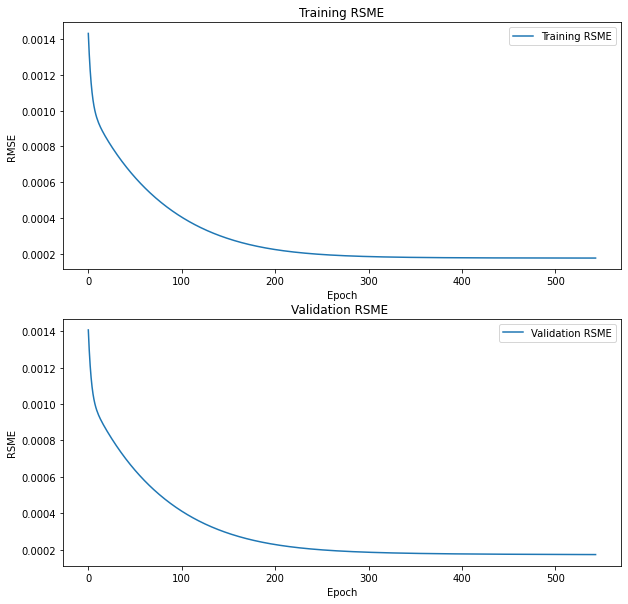

In [ ]:
import time


#w_gd=numpy.random.randint(0.000000001,high=0.001,size=41)
w_gd = np.random.uniform(low=0.00001,high=0.0001,size=41).reshape(-1,1)# initial weights
lr = 0.01  # learning rate
N=11000
#N=2750
rmse_list_gd_val =[] # a list for keeping track of our error
rmse_list_gd_train =[]
c=1
#rsme=[]
#for epoch in range (0, 11000): 
rsmegd_val=rmseds+1
cond=rmseds*1.001

start_time = time.time() ## Records current time
while rsmegd_val > cond:

  t_predicted_gd_val = np.dot(X_val_std, w_gd) # compute prediction of validation set
  

  t_predicted_gd_train = np.dot(X_train_std, w_gd) # compute prediction of training set

  t_train = y_train1 #put our target in the correct shape
  t_val=y_val1

  rsmegd_train=rmse(t_predicted_gd_train, t_train)
  rmse_list_gd_train.append(rsmegd_train); # calculate the rmse

  rsmegd_val=rmse(t_predicted_gd_val, t_val)
  rmse_list_gd_val.append(rsmegd_val); # calculate the rmse

  dumm=t_predicted_gd_train - t_train
  gradient = ( 1/N * np.dot(X_train_std1.T, dumm)); # calculate gradient
  w_gd = w_gd - lr * gradient; # run one step of gradient descent 

print("Total Training Time: %s seconds " % (time.time() - start_time))

# plot decrease of root mean square error of validation and training set

fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1, constrained_layout=False,sharex=False)
fig.set_figheight(10)
fig.set_figwidth(10)

ax1.plot(rmse_list_gd_train,label='Training RSME')
ax2.plot(rmse_list_gd_val,label='Validation RSME')

ax1.legend()
ax1.set_title('Training RSME')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("RMSE")

ax2.legend()
ax2.set_title('Validation RSME ')
ax2.set_xlabel("Epoch")
ax2.set_ylabel("RSME")


By oberving the training and validation RSME above, it can be concluded that the model is performing optimally, i.e. it is neither overfitted or underfitted. This is because the validation and training RSME is very close to each other.

## Part 4 - Mini-batch and Stochastic Gradient Descent 

In [ ]:
rsmegd_val 

0.00017264891149630483

In [ ]:
def mb(Xtrain,Ytrain,Xval,Yval,batch_size,lr,ct):
  import time
  
  w_mb = np.random.uniform(low=0.00001,high=0.0001,size=41) # initial weights
  N=len(Xtrain)
  #lr = 0.01  # learning rate
  rmse_list_mb_train =[] 
  rmse_list_mb_val =[]# a list for keeping track of our error
  #opp=X_train_std
  #opp['Goal']=y_train
  #tr=opp
  #batch_size = 75; 
  #tr1=y_val
  rsmegd_val=ct+1
  #ct=rmseds*1.001
  c=0
  time1=[]
  time12=0
  tr_main=Xtrain.copy()
  tr_y=Ytrain.copy()
  while rsmegd_val > ct:
  #for epoch in range (0, 10): 
    #print("Epoch :",c)
    start_time = time.time()
    for idx in range(0, N, batch_size): #remember range() input format is start-top-step
      x_batch_train = tr_main[idx: idx + batch_size] #iterate through the batches
      t_batch_train = tr_y[idx: idx + batch_size] #iterate through the batches
      t_predicted_mb_train = np.dot(x_batch_train, w_mb)

      

      gradient = (1/batch_size * np.dot(x_batch_train.T, t_predicted_mb_train - t_batch_train)); # calculate gradient
      w_mb = w_mb - lr * gradient
    time11= time.time() - start_time
    time12=time12+time11
    time1.append(time12)

    #rsmegd_val1=rmse(t_predicted_mb_val, t_batch_val)
    t_predicted_mb_val = np.dot(Xval, w_mb)
    t_batch_val=Yval
    rsmegd_val=rmse(t_predicted_mb_val, t_batch_val)
    #print("Validation RSME :",rsmegd_val)

    t_predicted_mb_train = np.dot(Xtrain, w_mb) 
    t_batch_train=Ytrain   
    rmse_list_mb_train.append(rmse(t_predicted_mb_train, t_batch_train));
    rmse_list_mb_val.append(rsmegd_val);
    
    if c>0:

      if (rmse_list_mb_val[c] - rmse_list_mb_val[(c-1)]) > 0.01 :

        print("Batch size ",batch_size,"is non convergent")
        break

        





    c=c+1
    opp=Xtrain.copy()
    opp['Goal']=Ytrain
    tr=opp.copy()

    tr=np.random.permutation(tr)
    tr=pd.DataFrame(data=tr,columns=opp.columns)
    tr_main=tr.iloc[:,0:41]
    tr_y=tr.iloc[:,41]
    
    
    
  #plt.plot(rmse_list_mb_train,label='Training RSME')
  #plt.plot(rmse_list_mb_val,label='Validation RSME')
  #plt.legend()
  #plt.title('Training and Validation RSME')
  #plt.xlabel("Epoch")
  #plt.ylabel("RMSE")
  #plt.show()
  return w_mb,rmse_list_mb_train,rmse_list_mb_val,time1

  

Batch size: 1
Batch size  1 is non convergent
Batch size: 2
Batch size  2 is non convergent
Batch size: 4
Batch size  4 is non convergent
Batch size: 8
Batch size  8 is non convergent
Batch size: 16
Batch size  16 is non convergent
Batch size: 32
Batch size  32 is non convergent
Batch size: 64
Batch size  64 is non convergent
Batch size: 128
Batch size: 256
Batch size: 512


Text(0, 0.5, 'Total Time(s)')

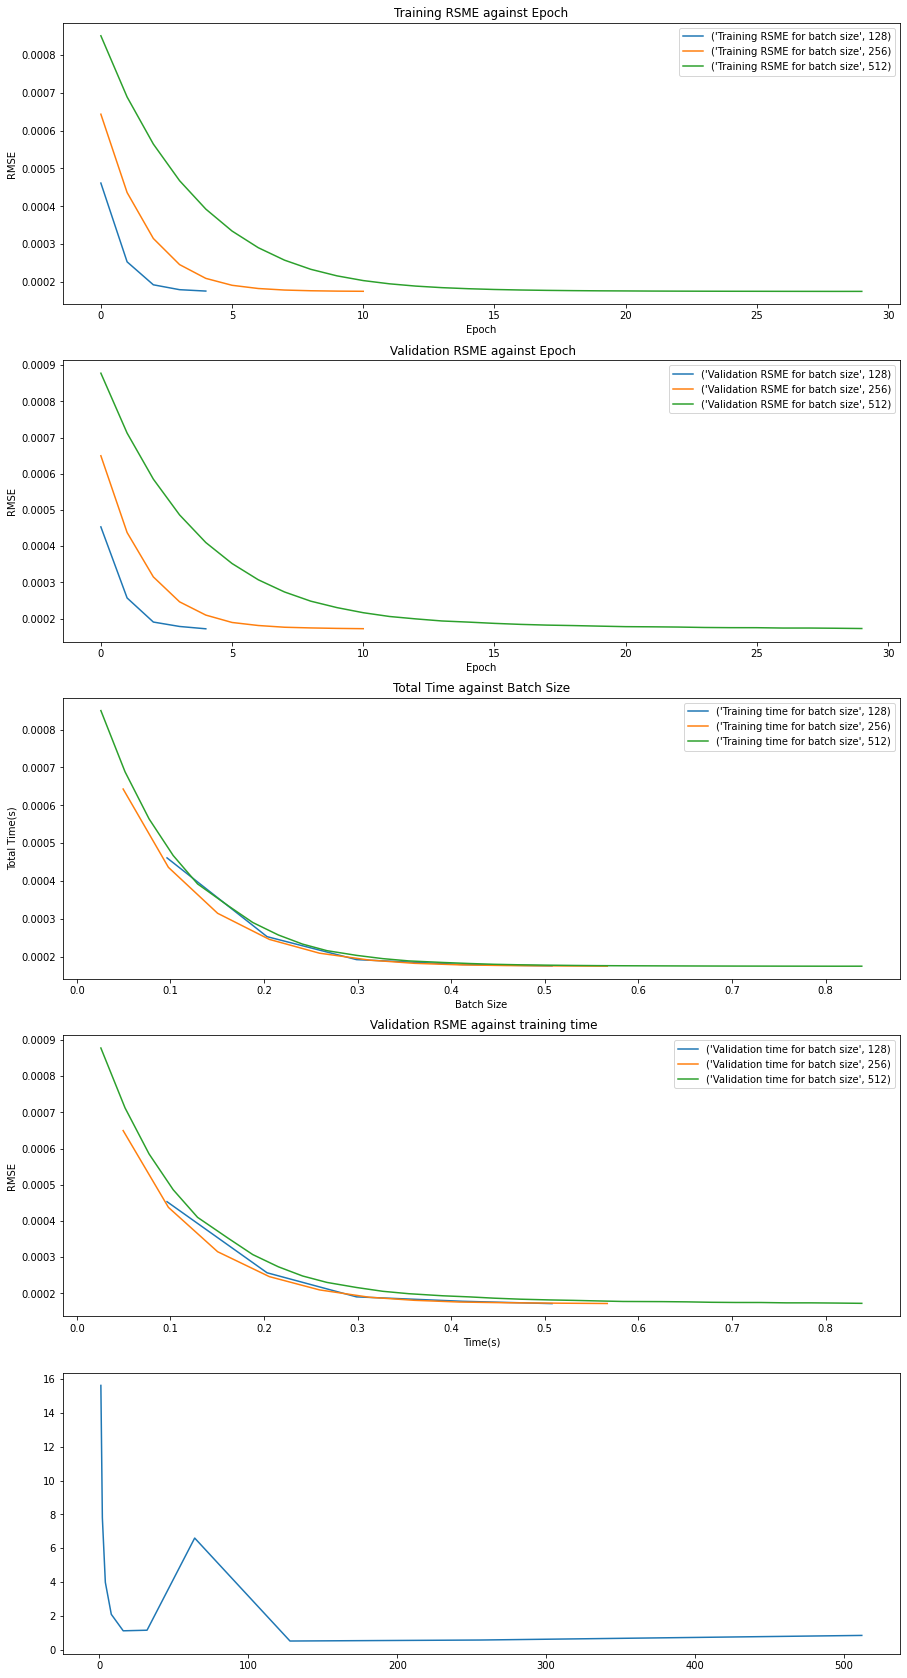

In [ ]:
ct=rmseds*1.001
time1=[]
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5,ncols=1, constrained_layout=False,sharex=False)
fig.set_figheight(30)
fig.set_figwidth(15)
batch_size1=[1,2,4,8,16,32,64,128,256,512]
for batch_size in [1,2,4,8,16,32,64,128,256,512]:
  print("Batch size:",batch_size)
  w,rst,rsv,time=mb(X_train_std,y_train,X_val_std,y_val,batch_size,0.01,ct)
  #time1.append(time[-1])
  time1.append(time[-1])
  if (rsv[-1] - rsv[-2]) < 0.01 :

    ax1.plot(rst,label=('Training RSME for batch size',batch_size))
    ax2.plot(rsv,label=('Validation RSME for batch size',batch_size))

    ax3.plot(time,rst,label=('Training time for batch size',batch_size))
    ax4.plot(time,rsv,label=('Validation time for batch size',batch_size))

    ax1.legend()
    ax1.set_title('Training RSME against Epoch')
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("RMSE")
    #plt.show()



    ax2.legend()
    ax2.set_title(' Validation RSME against Epoch')
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("RMSE")

    ax3.legend()
    ax3.set_title('Training RSME against training time')
    ax3.set_xlabel("Time(s)")
    ax3.set_ylabel("RMSE")

    ax4.legend()
    ax4.set_title(' Validation RSME against training time')
    ax4.set_xlabel("Time(s)")
    ax4.set_ylabel("RMSE")











ax5.plot(batch_size1,time1)
#ax3.legend()
ax3.set_title('Total Time against Batch Size')
ax3.set_xlabel("Batch Size")
ax3.set_ylabel("Total Time(s)")






The main findings from the analysis above are:

1) Smaller batch sizes (below 128) did not converge to fulfill the Convergence Threshold. 

2) The training and validation RSME did not vary much from each other signifying that the model is performing optimally

3) Models with smaller batch sizes converged with less epochs while models with bigger batch sizes took more epochs to converge. Therefore, selection of batch size should be done carefully as lesser number of batch size doesnt converge while higher number of convergence takes more iterations. 

4) Out of all the converged batch sizes, batch size of 128 converged fastest.

5) The total time plot shows that the total time for batch number greater than 128 is the lowest.

## Part 5 - Weight Decay Regularization 


The learning rate and batch size used for this problem is 0.01 and 256, respectively.

In [ ]:
def pt5(lamda):

  import time

  w_mb = np.random.uniform(low=0.00001,high=0.0001,size=41) # initial weights
  N=len(X_train_std)
  lr = 0.01  # learning rate
  rmse_list_mb_train =[] 
  rmse_list_mb_val =[]# a list for keeping track of our error
  #opp=X_train_std
  #opp['Goal']=y_train
  #tr=opp
  batch_size = 256; 
  #tr1=y_val
  ct=rmseds*1.001
  rsmegd_val=ct+1
  
  c=0
  time1=[]
  time12=0
  tr_main=X_train_std.copy()
  tr_y=y_train.copy()
  while rsmegd_val > ct:
  #for epoch in range (0, 10): 
    print("Epoch :",c)
    start_time = time.time()
    for idx in range(0, N, batch_size): #remember range() input format is start-top-step
      x_batch_train = tr_main[idx: idx + batch_size] #iterate through the batches
      t_batch_train = tr_y[idx: idx + batch_size] #iterate through the batches
      t_predicted_mb_train = np.dot(x_batch_train, w_mb)

      

      gradient = (1/batch_size * np.dot(x_batch_train.T, t_predicted_mb_train - t_batch_train)); # calculate gradient
      w_mb = (1-(lr*lamda))*(w_mb) - (lr * gradient)
    time11= time.time() - start_time
    time12=time12+time11
    time1.append(time12)

    #rsmegd_val1=rmse(t_predicted_mb_val, t_batch_val)
    t_predicted_mb_val = np.dot(X_val_std, w_mb)
    t_batch_val=y_val
    rsmegd_val=rmse(t_predicted_mb_val, t_batch_val)
    print("Validation RSME :",rsmegd_val)

    t_predicted_mb_train = np.dot(X_train_std, w_mb) 
    t_batch_train=y_train   
    rmse_list_mb_train.append(rmse(t_predicted_mb_train, t_batch_train));
    rmse_list_mb_val.append(rsmegd_val);
    
    if c>1 :

      if (rmse_list_mb_val[c] > rmse_list_mb_val[(c-1)]):
        if (rmse_list_mb_val[c-1] > rmse_list_mb_val[(c-2)]):

          print("Hyperparameter setting ",lamda,"is non convergent")
          break

    if c>500:

      break

        





    c=c+1
    opp=X_train_std.copy()
    opp['Goal']=y_train
    tr=opp.copy()

    tr=np.random.permutation(tr)
    tr=pd.DataFrame(data=tr,columns=opp.columns)
    tr_main=tr.iloc[:,0:41]
    tr_y=tr.iloc[:,41]
    
    
    
  #plt.plot(rmse_list_mb_train,label='Training RSME')
  #plt.plot(rmse_list_mb_val,label='Validation RSME')
  #plt.legend()
  #plt.title('Training and Validation RSME')
  #plt.xlabel("Epoch")
  #plt.ylabel("RMSE")
  #plt.show()
  print("Time taken: ",time1[-1])
  return w_mb,rmse_list_mb_train,rmse_list_mb_val,time1



Lambda: 0
Epoch : 0
Validation RSME : 0.0006939521765329685
Epoch : 1
Validation RSME : 0.0004707897168624879
Epoch : 2
Validation RSME : 0.0003355800970845582
Epoch : 3
Validation RSME : 0.0002591727022696061
Epoch : 4
Validation RSME : 0.00021805312937984905
Epoch : 5
Validation RSME : 0.00019559063652064808
Epoch : 6
Validation RSME : 0.00018484182669971917
Epoch : 7
Validation RSME : 0.00017979248413102988
Epoch : 8
Validation RSME : 0.00017564428122016911
Epoch : 9
Validation RSME : 0.00017436020290417185
Epoch : 10
Validation RSME : 0.0001729577902926681
Epoch : 11
Validation RSME : 0.00017285849632891066
Epoch : 12
Validation RSME : 0.00017249553644143708
Time taken:  0.7228875160217285
Lambda: 0.0001
Epoch : 0
Validation RSME : 0.0006690530670480086
Epoch : 1
Validation RSME : 0.00045704565253876824
Epoch : 2
Validation RSME : 0.0003302050412393602
Epoch : 3
Validation RSME : 0.0002575941249970098
Epoch : 4
Validation RSME : 0.00021741154630547458
Epoch : 5
Validation RSME : 0.

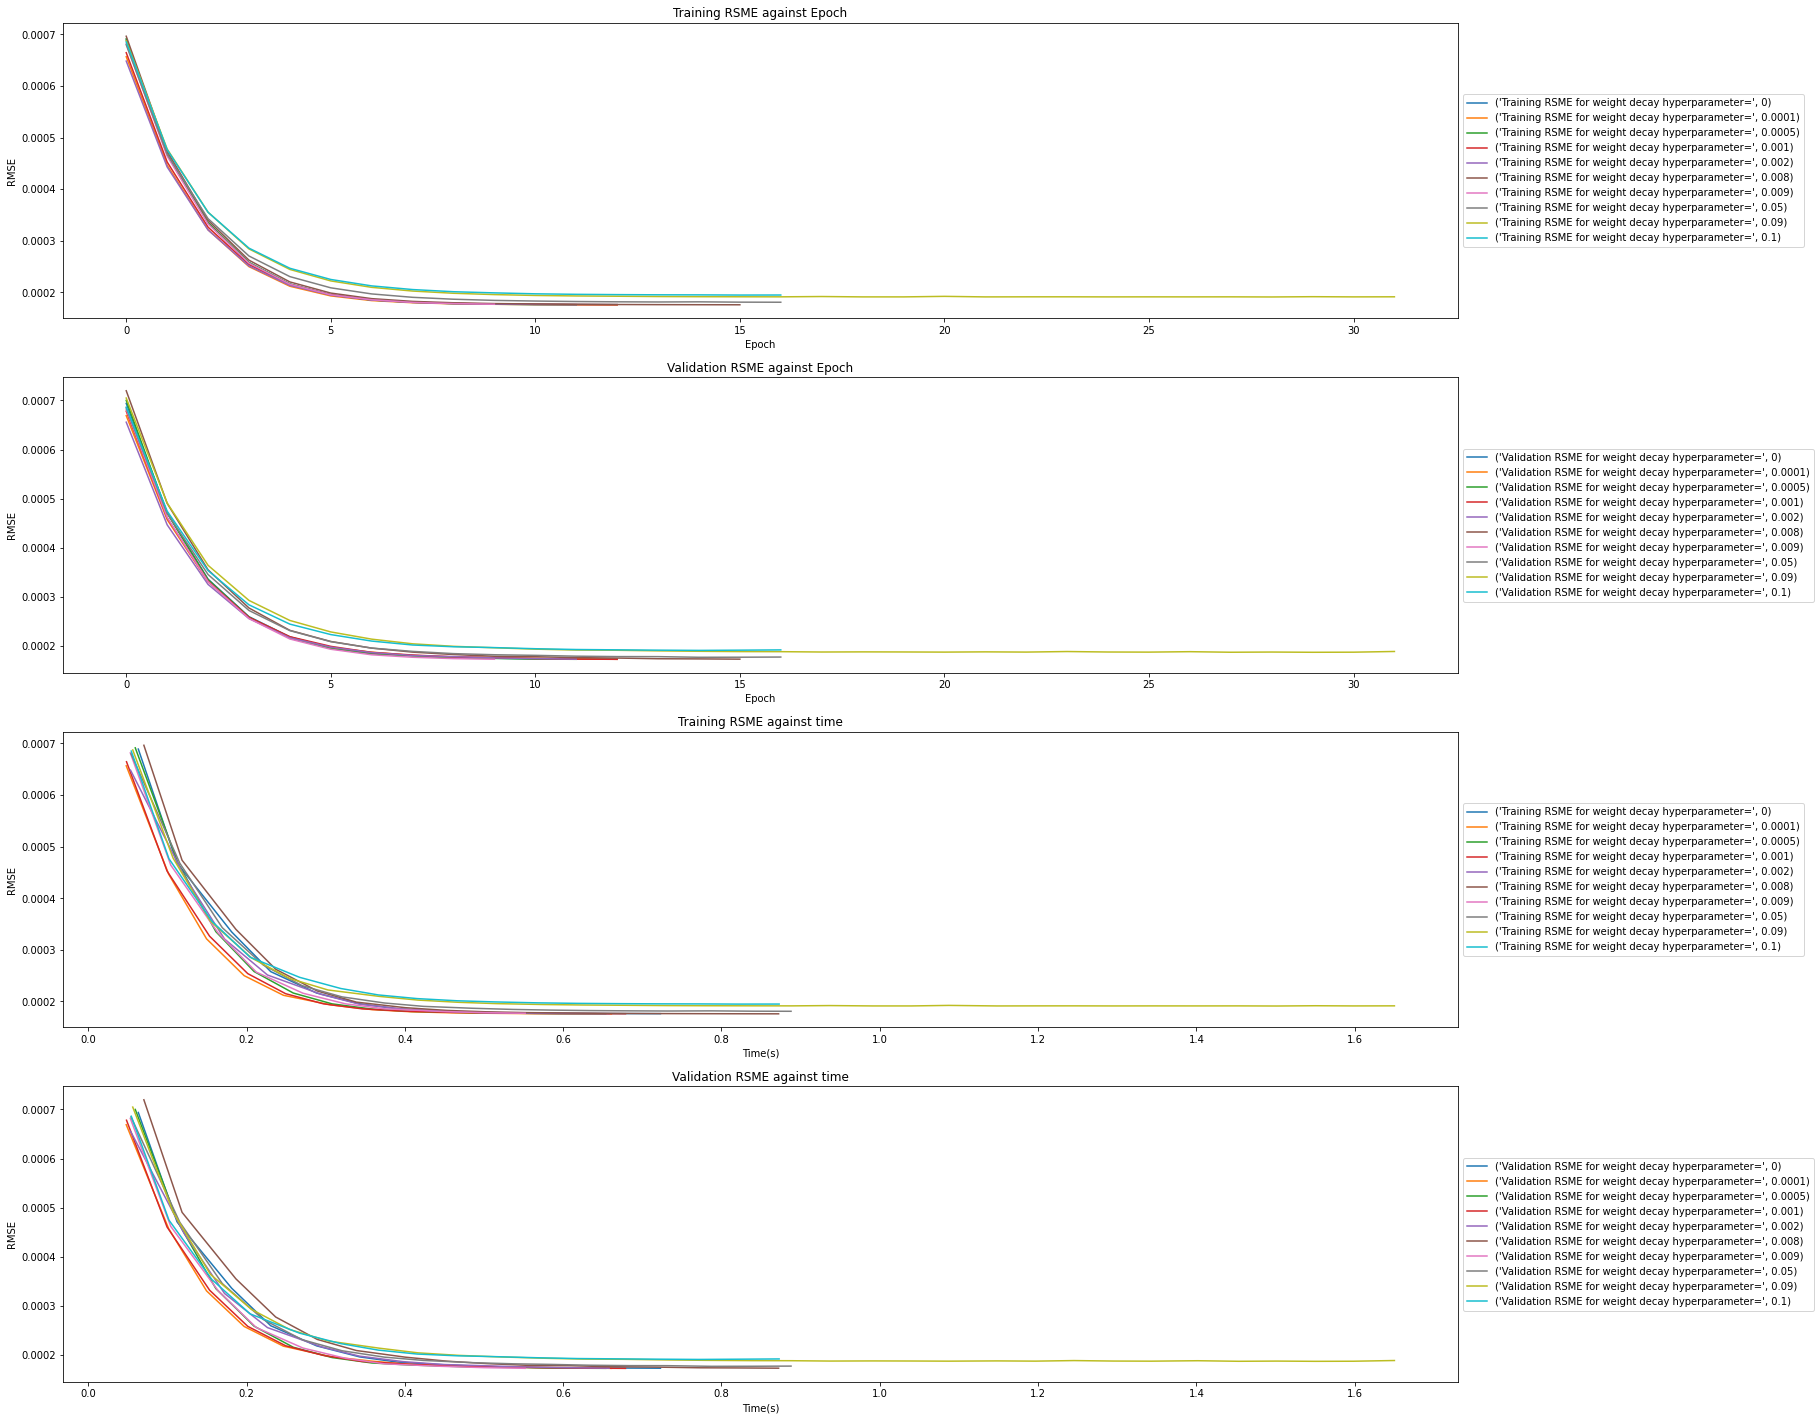

In [ ]:
ct=rmseds*1.001
time1=[]
fig, (ax1, ax2,ax3,ax4) = plt.subplots(nrows=4, ncols=1)

fig.set_figheight(25)
fig.set_figwidth(25)
#batch_size1=[1,2,4,8,16,32,64,128,256,512]
#lamda1=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,]
lamda1=[0,0.0001,0.0005,0.001,0.002,0.008,0.009,0.05,0.09,0.1,]
for lamda in lamda1:
  print("Lambda:",lamda)
  w,rst,rsv,time=pt5(lamda)
  #time1.append(time[-1])
  time1.append(time[-1])
  #if (rsv[-1] - rsv[-2]) < 0 :

  ax1.plot(rst,label=('Training RSME for weight decay hyperparameter=',lamda))
  ax2.plot(rsv,label=('Validation RSME for weight decay hyperparameter=',lamda))
  ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

  ax1.set_title('Training RSME against Epoch')
  ax1.set_xlabel("Epoch")
  ax1.set_ylabel("RMSE")
  ax2.set_title('Validation RSME against Epoch')
  ax2.set_xlabel("Epoch")
  ax2.set_ylabel("RMSE")
  #plt.show()


  ax3.plot(time,rst,label=('Training RSME for weight decay hyperparameter=',lamda))
  ax4.plot(time,rsv,label=('Validation RSME for weight decay hyperparameter=',lamda))

  ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  ax3.set_title('Training RSME against time')
  ax3.set_xlabel("Time(s)")
  ax3.set_ylabel("RMSE")

  ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  ax4.set_title('Validation RSME against time')
  ax4.set_xlabel("Time(s)")
  ax4.set_ylabel("RMSE")








The main findings from the above analysis are:

1) The training and validation RSME doest not vary much signifying the good fit of the model

2) Out of the given hyperparameter settings, higher values of hyperparameter did not converge (values 0.05, 0.09 and 0.1). 

3) The model with lesser magnitude of hyperparameter setting took little bit less number of epochs to converge. 

For the above reasons, it can be said that the model works best for lower values of hyperparameter settings which is closer to 0 such as 0.0001. 

## Part 6 - Finalizing a model [1 marks]


**The model which would work best for the dataset is mini-batch gradient descent with 128 batch size**

This particular model was chosen because out of other models, this model converged with lesser number of epochs. Therefore, it is the most efficient model to use for the data.

Text(0, 0.5, 'RMSE')

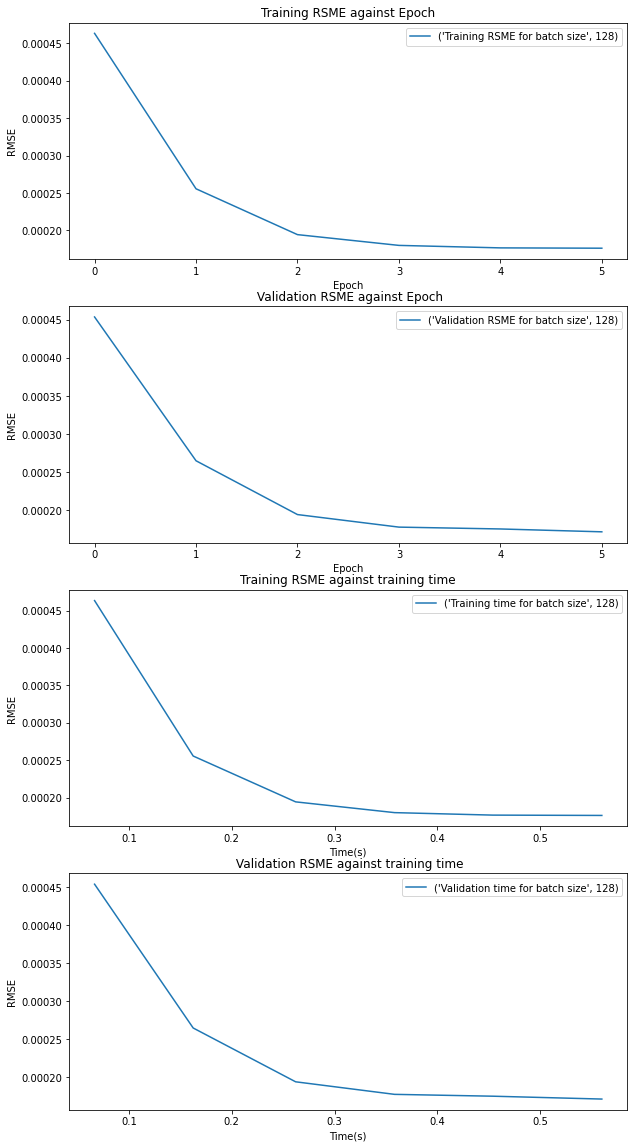

In [ ]:
import time
Xtrain=X_train_std
Ytrain=y_train
Xval=X_val_std
Yval=y_val
w_mb = np.random.uniform(low=0.00001,high=0.0001,size=41) # initial weights
#return w_mb,rmse_list_mb_train,rmse_list_mb_val,time1

N=len(Xtrain)
lr = 0.01  # learning rate
rmse_list_mb_train =[] 
rmse_list_mb_val =[]# a list for keeping track of our error
#opp=X_train_std
#opp['Goal']=y_train
#tr=opp
batch_size =128
#tr1=y_val
ct=rmseds*1.001
rsmegd_val=ct+1



c=0
time1=[]
time12=0
tr_main=Xtrain.copy()
tr_y=Ytrain.copy()
while rsmegd_val > ct:
#for epoch in range (0, 10): 
  #print("Epoch :",c)
  start_time = time.time()
  for idx in range(0, N, batch_size): #remember range() input format is start-top-step
    x_batch_train = tr_main[idx: idx + batch_size] #iterate through the batches
    t_batch_train = tr_y[idx: idx + batch_size] #iterate through the batches
    t_predicted_mb_train = np.dot(x_batch_train, w_mb)

    

    gradient = (1/batch_size * np.dot(x_batch_train.T, t_predicted_mb_train - t_batch_train)); # calculate gradient
    w_mb = w_mb - lr * gradient
  time11= time.time() - start_time
  time12=time12+time11
  time1.append(time12)

  #rsmegd_val1=rmse(t_predicted_mb_val, t_batch_val)
  t_predicted_mb_val = np.dot(Xval, w_mb)
  t_batch_val=Yval
  rsmegd_val=rmse(t_predicted_mb_val, t_batch_val)
  #print("Validation RSME :",rsmegd_val)

  t_predicted_mb_train = np.dot(Xtrain, w_mb) 
  t_batch_train=Ytrain   
  rmse_list_mb_train.append(rmse(t_predicted_mb_train, t_batch_train));
  rmse_list_mb_val.append(rsmegd_val);
  
  




  c=c+1
  opp=Xtrain.copy()
  opp['Goal']=Ytrain
  tr=opp.copy()

  tr=np.random.permutation(tr)
  tr=pd.DataFrame(data=tr,columns=opp.columns)
  tr_main=tr.iloc[:,0:41]
  tr_y=tr.iloc[:,41]
  
  
  
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4,ncols=1, constrained_layout=False,sharex=False)
fig.set_figheight(20)
fig.set_figwidth(10)


ax1.plot(rmse_list_mb_train,label=('Training RSME for batch size',batch_size))
ax2.plot(rmse_list_mb_val,label=('Validation RSME for batch size',batch_size))

ax3.plot(time1,rmse_list_mb_train,label=('Training time for batch size',batch_size))
ax4.plot(time1,rmse_list_mb_val,label=('Validation time for batch size',batch_size))

ax1.legend()
ax1.set_title('Training RSME against Epoch')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("RMSE")
#plt.show()



ax2.legend()
ax2.set_title(' Validation RSME against Epoch')
ax2.set_xlabel("Epoch")
ax2.set_ylabel("RMSE")

ax3.legend()
ax3.set_title('Training RSME against training time')
ax3.set_xlabel("Time(s)")
ax3.set_ylabel("RMSE")

ax4.legend()
ax4.set_title(' Validation RSME against training time')
ax4.set_xlabel("Time(s)")
ax4.set_ylabel("RMSE")




The mini-batch gradient descent model used to solve this problem performed optimally. However, the mini-batch gradient descent model should not be used to manage the ailerons of the aircraft. Instead, a more sophisticated model should be used.

**The pros and cons of mini-batch gradient descent model are:**

Pros: 

1) Convergence is more stable

2) Computationally efficient

3) More updates means faster learning 

Cons:

1) Hyperparameter optimization (batch size)

2) May not converge to the global minima

**Private Repository Link :** ------------------- https://github.com/aps1070-2019/project_4_git_s21-shrirupdwivedi ---------------- **[3 marks]**